In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
file_path = r"D:\data\internship\3\Task 4\kaggle_survey_2017_2021.csv"
chunksize = 10000

# Check the column names (first chunk only)
first_chunk = pd.read_csv(file_path, nrows=1)
columns = list(first_chunk.columns)

C:\Users\AdminPC\AppData\Local\Temp\ipykernel_2924\1553863835.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_series.values, y=lang_series.index, palette='cubehelix')


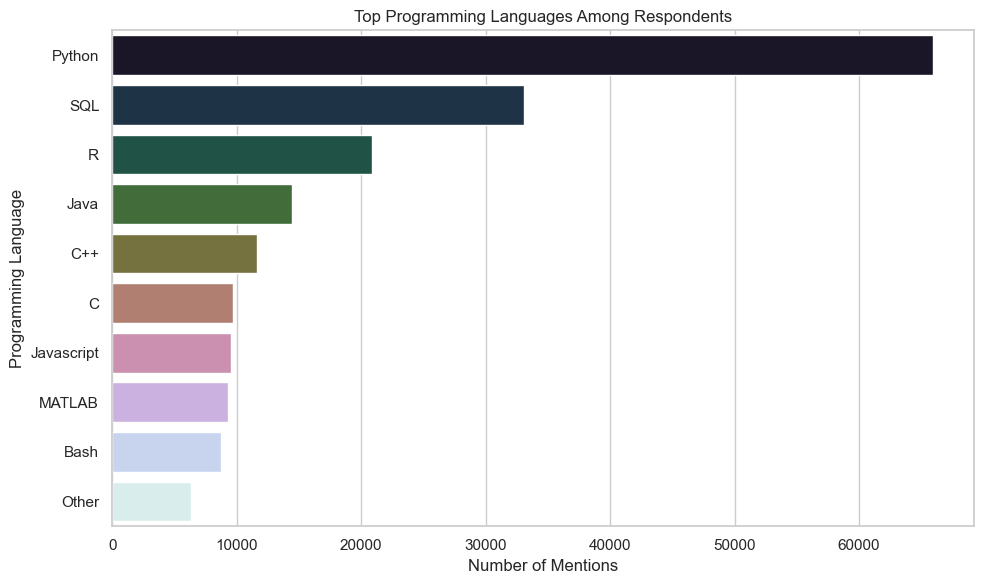

In [14]:
language_cols = [col for col in columns if 'Q7_Part' in col or 'Q7_OTHER' in col]

language_counts = {}

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    for col in language_cols:
        if col in chunk.columns:
            selected = chunk[col].dropna().astype(str)
            for lang in selected:
                lang = lang.strip()
                if lang.lower() in ['none', 'nan', '']:
                    continue
                language_counts[lang] = language_counts.get(lang, 0) + 1

lang_series = pd.Series(language_counts).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=lang_series.values, y=lang_series.index, palette='cubehelix')
plt.title("Top Programming Languages Among Respondents")
plt.xlabel("Number of Mentions")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()


C:\Users\AdminPC\AppData\Local\Temp\ipykernel_2924\1739113918.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_series.values, y=role_series.index, palette='crest')


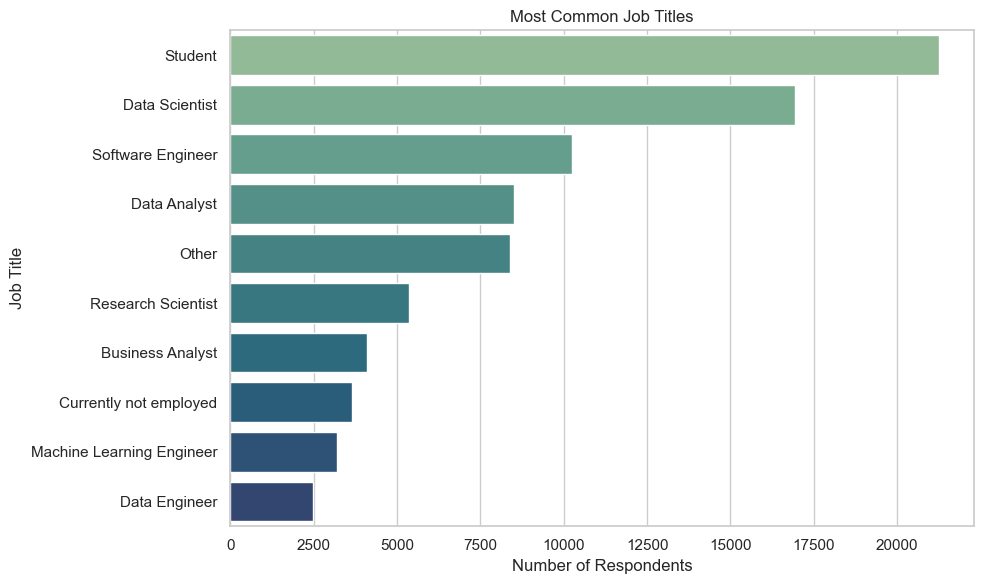

In [15]:
role_col = [col for col in columns if "Job Title" in col or "Q5" in col][0]

role_counts = {}

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    if role_col in chunk.columns:
        roles = chunk[role_col].dropna().astype(str)
        for role in roles:
            role = role.strip()
            role_counts[role] = role_counts.get(role, 0) + 1

role_series = pd.Series(role_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=role_series.values, y=role_series.index, palette='crest')
plt.title("Most Common Job Titles")
plt.xlabel("Number of Respondents")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


C:\Users\AdminPC\AppData\Local\Temp\ipykernel_2924\1664661882.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_series.values, y=country_series.index, palette='Set2')


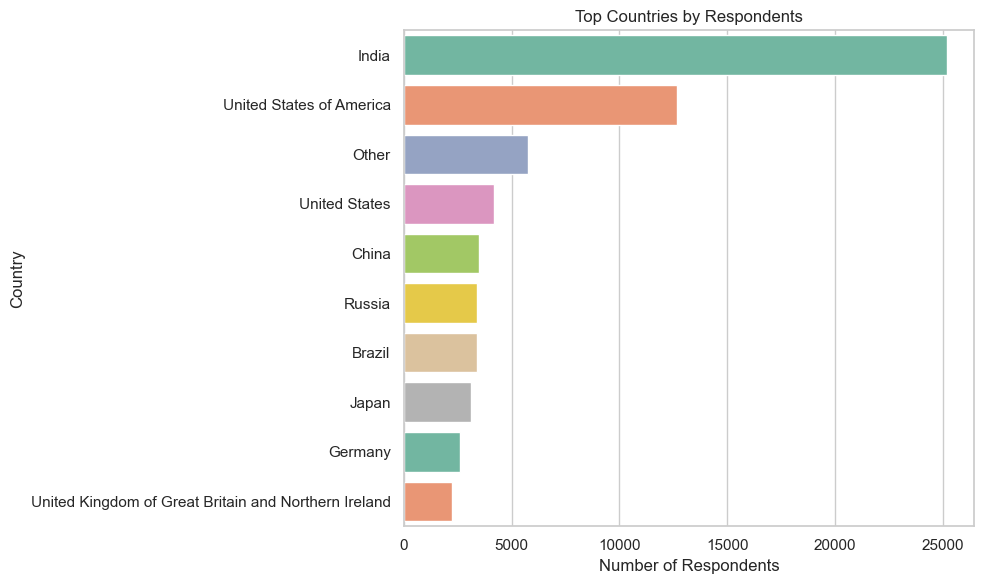

In [16]:
country_col = [col for col in columns if "Country" in col or "Q3" in col][0]

country_counts = {}

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    if country_col in chunk.columns:
        countries = chunk[country_col].dropna().astype(str)
        for country in countries:
            country = country.strip()
            country_counts[country] = country_counts.get(country, 0) + 1

country_series = pd.Series(country_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_series.values, y=country_series.index, palette='Set2')
plt.title("Top Countries by Respondents")
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\AdminPC\AppData\Local\Temp\ipykernel_2924\3233579540.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_series.values, y=edu_series.index, palette='Set1')


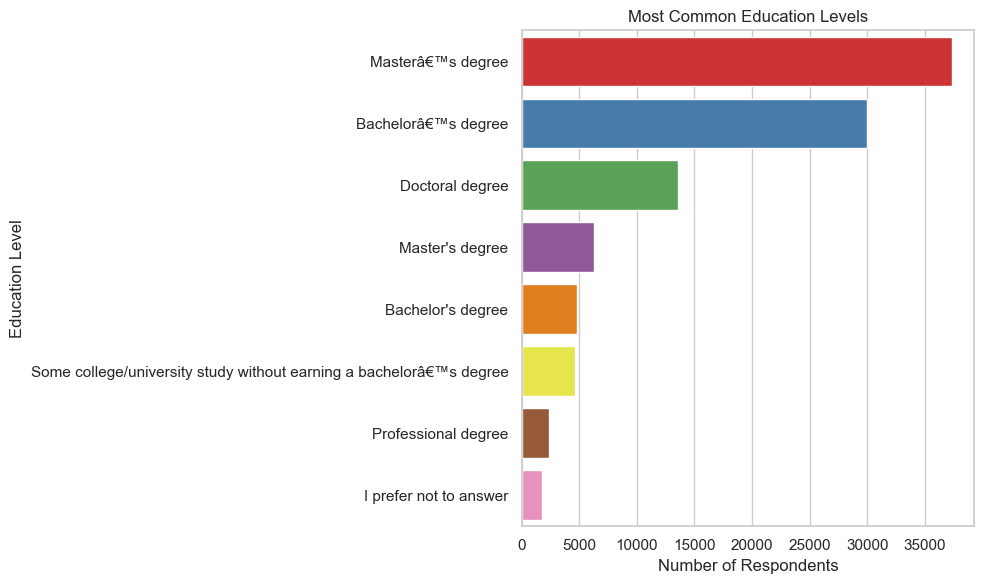

In [17]:
edu_col = [col for col in columns if "Education" in col or "Q4" in col][0]

edu_counts = {}

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    if edu_col in chunk.columns:
        edus = chunk[edu_col].dropna().astype(str)
        for edu in edus:
            edu = edu.strip()
            edu_counts[edu] = edu_counts.get(edu, 0) + 1

edu_series = pd.Series(edu_counts).sort_values(ascending=False).head(8)

plt.figure(figsize=(10,6))
sns.barplot(x=edu_series.values, y=edu_series.index, palette='Set1')
plt.title("Most Common Education Levels")
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


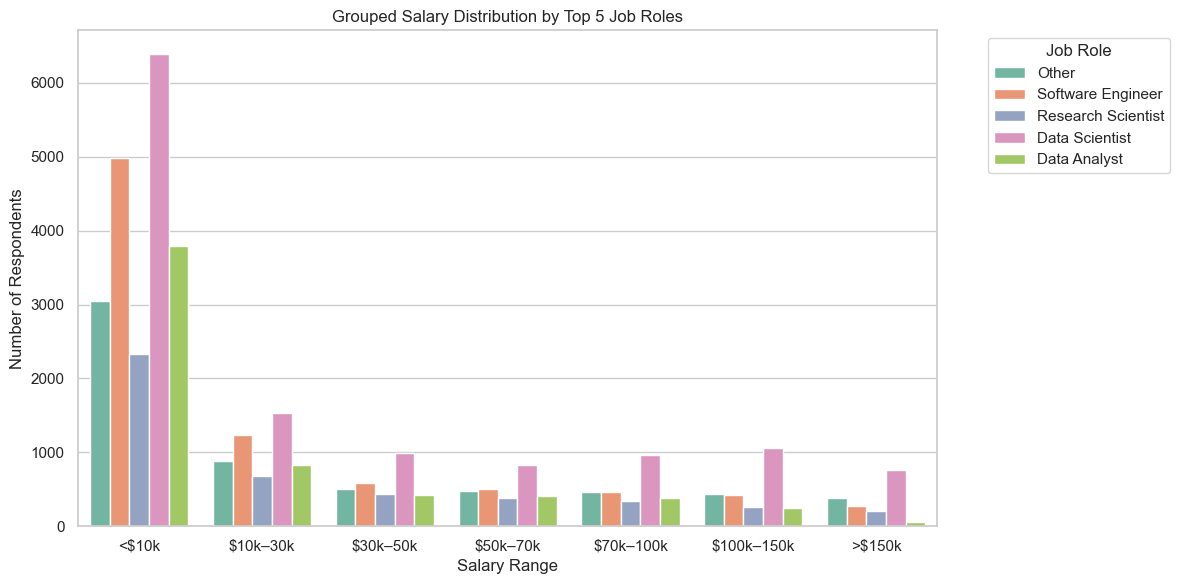

In [18]:
import re

# Manually known columns
salary_column = "Q25"
job_column = "Q5"

# Salary bin mapping function
def map_salary_range(salary):
    salary = str(salary)
    salary = salary.replace(",", "").replace("$", "").strip().lower()

    # Common responses
    if "not wish" in salary or "disclose" in salary:
        return "Undisclosed"
    if "nan" in salary or salary == "":
        return None

    # Convert to numeric ranges
    pattern = re.findall(r"\d{1,6}", salary)
    if len(pattern) >= 1:
        try:
            low = int(pattern[0])
            if low < 10000:
                return "<$10k"
            elif low < 30000:
                return "$10k–30k"
            elif low < 50000:
                return "$30k–50k"
            elif low < 70000:
                return "$50k–70k"
            elif low < 100000:
                return "$70k–100k"
            elif low < 150000:
                return "$100k–150k"
            else:
                return ">$150k"
        except:
            return None
    return None

# Read + filter data
df_list = []
for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    if job_column in chunk.columns and salary_column in chunk.columns:
        temp_df = chunk[[job_column, salary_column]].dropna()
        temp_df = temp_df[
            (temp_df[job_column] != 'nan') &
            (temp_df[salary_column] != 'nan')
        ]
        temp_df["SalaryBin"] = temp_df[salary_column].apply(map_salary_range)
        df_list.append(temp_df)

# Combine and clean
df_clean = pd.concat(df_list, ignore_index=True)
df_clean = df_clean.dropna(subset=["SalaryBin"])

# Top job roles
top_jobs = df_clean[job_column].value_counts().nlargest(5).index
df_filtered = df_clean[df_clean[job_column].isin(top_jobs)]

# Order of salary bins
bin_order = ["<$10k", "$10k–30k", "$30k–50k", "$50k–70k", "$70k–100k", "$100k–150k", ">$150k"]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_filtered,
    x="SalaryBin",
    hue=job_column,
    order=bin_order,
    palette="Set2"
)
plt.title("Grouped Salary Distribution by Top 5 Job Roles")
plt.xlabel("Salary Range")
plt.ylabel("Number of Respondents")
plt.legend(title="Job Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Survey Insights Summary

1. **Top Programming Languages:** Python, SQL, and JavaScript are the most frequently used languages among survey respondents.
2. **Most Common Job Titles:** Data Scientist, Data Analyst, and Software Engineer lead the pack.
3. **Top Countries:** United States, India, and Japan are the most represented countries.
4. **Most Common Education Levels:** Master’s degree and Bachelor’s degree dominate the educational background of respondents.
5. **Salary distribution:** Software Engineers and Data Scientists dominate the higher income brackets, while Analysts and Researchers are more spread across mid-level salaries.

These insights help understand the evolving landscape of skills, tools, and demographics in the data science community.
